# Описание

Самый простой фрактал

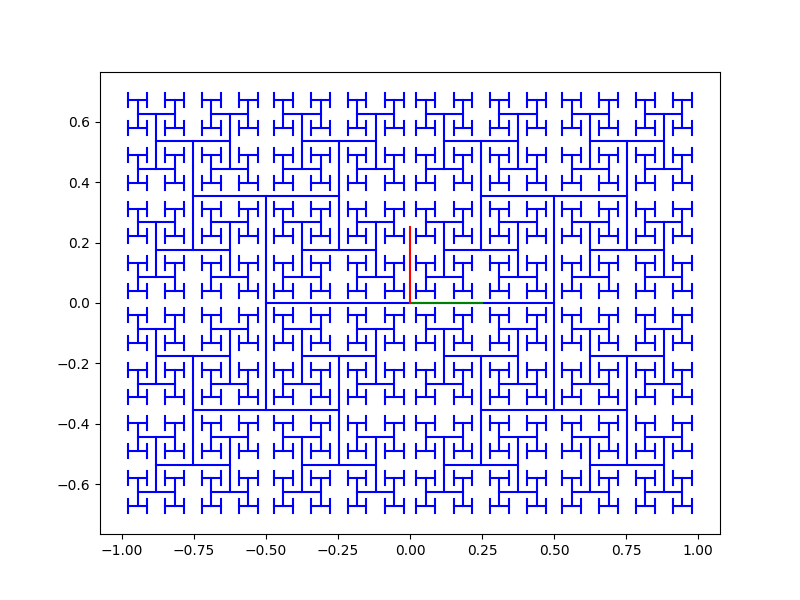

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def drawFractal(ax, gens, diffX, diffY, angleA=0, angleB=90):
    vec = lambda angle: np.array(
        (np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle)))
    )

    a = vec(angleA)
    b = vec(angleB)


    coefX = lambda gen: diffX**(gen+1)
    coefY = lambda gen: diffY**(gen+1)

    A = np.array([[-a/2, a/2]])

    for gen in range(gens):
        add = (a*coefX(gen))/2 if (gen%2 == 1) else (b*coefY(gen))/2
        for j in range(2**gen):
            A = np.concat(
                (A,
                [
                    [   
                        A[2**gen-1+j][1] - add, 
                        A[2**gen-1+j][1] + add 
                    ],
                    [     # coord   component
                        A[2**gen-1+j][0] - add, 
                        A[2**gen-1+j][0] + add
                    ]
                ]),
                axis = 0
            )

    for i in range(len(A)):
        ax.plot(*A[i].T, c=color)
    ax.plot(*np.concat(([vec(angleA)/4], [[0,0]])).T, c = "green")
    ax.plot(*np.concat(([vec(angleB)/4], [[0,0]])).T, c = "red")

fig, ax = plt.subplots(figsize=(8, 6))
diff = 0.711
drawFractal(ax, 9, diff, diff, 0, 90)


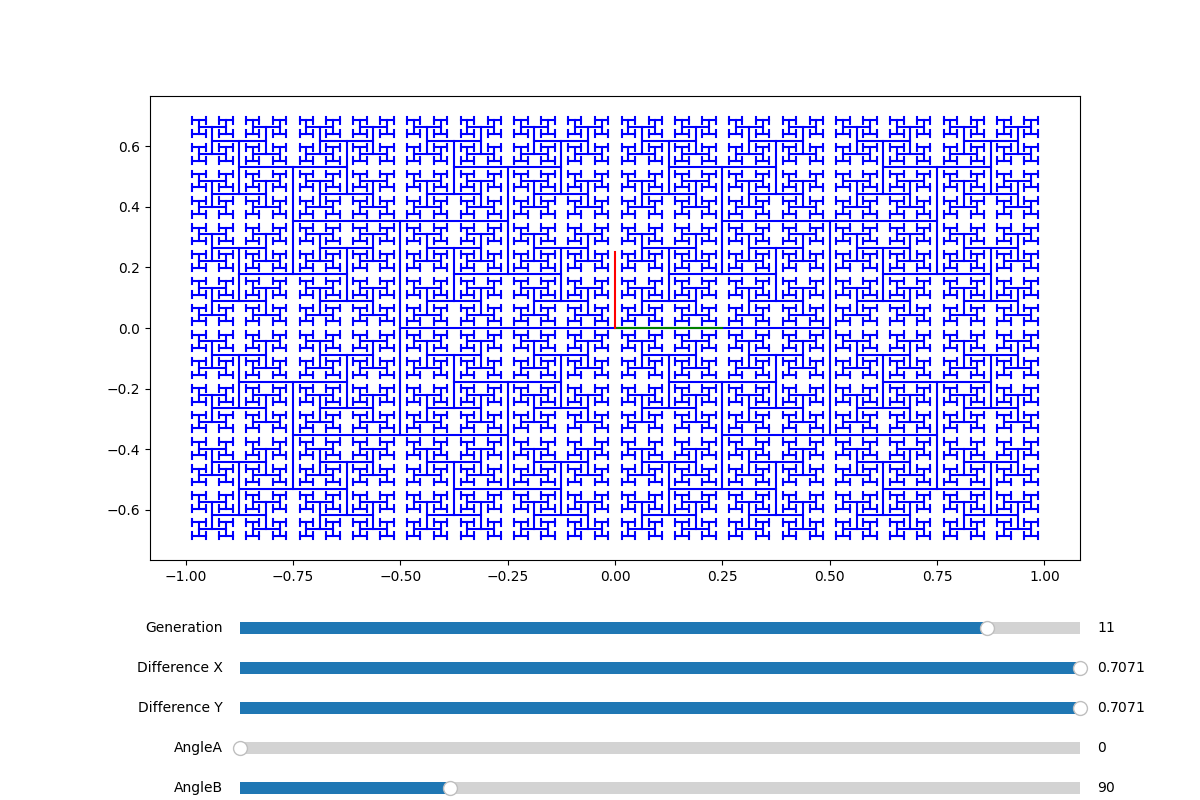

In [57]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def update(val):
    ax.clear()
    gens = gens_slider.val
    diffX = diffX_slider.val
    diffY = diffY_slider.val
    angleA = angleA_slider.val
    angleB = angleB_slider.val
    drawFractal(ax, gens, diffX, diffY, angleA, angleB)
    plt.draw()

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(bottom=0.3)

# Начальная длина фрактала
color = "blue"
gens = 11

angleA = 0
angleB = 90

diff = np.sqrt(2)/2
diffX = diff
diffY = diff

drawFractal(ax, gens, diffX, diffY, angleA, angleB)
slider_size = (0.2, 0.7)

# Настраиваем слайдер
gens_slider = Slider(
    plt.axes([slider_size[0], 0.2, slider_size[1], 0.03]), 
    'Generation', 3, 12, 
    valstep=1, valinit=gens)
diffX_slider = Slider(
    plt.axes([slider_size[0], 0.15, slider_size[1], 0.03]), 
    'Difference X', 0, np.sqrt(2)/2, 
    valinit=diffX)
diffY_slider = Slider(
    plt.axes([slider_size[0], 0.1, slider_size[1], 0.03]), 
    'Difference Y', 0, np.sqrt(2)/2, 
    valinit=diffY)
angleA_slider = Slider(
    plt.axes([slider_size[0], 0.05, slider_size[1], 0.03]), 
    'AngleA', 0, 360, 
    valstep=1, valinit=angleA)
angleB_slider = Slider(
    plt.axes([slider_size[0], 0, slider_size[1], 0.03]), 
    'AngleB', 0, 360, 
    valstep=1, valinit=angleB)

gens_slider.on_changed(update)
diffX_slider.on_changed(update)
diffY_slider.on_changed(update)
angleA_slider.on_changed(update)
angleB_slider.on_changed(update)

plt.show()


Параметры `diffX` и `diffY` позволяют настроить сближение концов отрезков на последнем уровне.
Для этого нужно решить два уравнения:
$$
\sum_{n=1}^{m}d^{2n}=1, d>0 \tag{1}
$$
При раскрытии суммы получаем формулу:
$$
\frac{d^2(d^{2m}-1)}{d^2-1}=1, d>0  \tag{2}
$$
**Открытая задача:** найти формулу функции $d(m)$ по уравнению (2)

$$
\begin{array}{l}
    \dfrac{(d^{2m}-1)}{1-d^{-2}}=1\\[10pt]
    d^{2m}+d^{-2}-2=0\\
\end{array}
$$


---

Для полного фрактала $m\to\infty$ и $d^{2m}\to0$.  
Тогда формула примет вид:
$$
\frac{-d^2}{d^2-1}=1, d>0
$$
И ответом будет $d=\dfrac{\sqrt{2}}{2}$
